Import Library sesuai dengan yang dibutuhkan berdasarkan data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import os
import sys
import io



---


Import dataset dari file 'used_cars.csv'




biasa setiap sambungan terputus maka harus diupload lagi secara manual datasetnya.

In [8]:
from google.colab import files
uploaded = files.upload()



---


Membaca file dataset 'used_cars.csv'

In [0]:
dataset = pd.read_csv('used_cars.csv')



---


Mengambil fitur/kolom yang diperlukan dari dataset tersebut yang akan dipakai selanjutnya

In [10]:
dataset = dataset[['odometer','cylinders','transmission','paint_color','size','condition','fuel','year','model','price']]
dataset.head()

,odometer,cylinders,transmission,paint_color,size,condition,fuel,year,model,price
0,63500.0,4 cylinders,manual,black,compact,excellent,gas,2012.0,golf r,17899
1,10.0,NaN,automatic,NaN,NaN,excellent,gas,2016.0,f-150,0
2,7554.0,NaN,automatic,white,NaN,excellent,gas,2015.0,sierra 1500,46463
3,10.0,NaN,automatic,NaN,NaN,excellent,gas,2016.0,f-150,0
4,70150.0,NaN,automatic,white,NaN,NaN,diesel,2018.0,f-450,49999


In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
odometer,17612.0,99164.345446,7.963487e+04,0.0,50133.0,93899.0,133909.0,2.500005e+06
year,19989.0,2009.830657,7.913613e+00,1917.0,2007.0,2011.0,2015.0,2.020000e+03
price,20001.0,76640.584071,8.335762e+06,0.0,3970.0,8795.0,17495.0,1.172420e+09


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   odometer      17612 non-null  float64
 1   cylinders     12916 non-null  object 
 2   transmission  19811 non-null  object 
 3   paint_color   14487 non-null  object 
 4   size          6886 non-null   object 
 5   condition     10849 non-null  object 
 6   fuel          19928 non-null  object 
 7   year          19989 non-null  float64
 8   model         19736 non-null  object 
 9   price         20001 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 1.5+ MB


In [13]:
dataset.isna().sum()

odometer         2389
cylinders        7085
transmission      190
paint_color      5514
size            13115
condition        9152
fuel               73
year               12
model             265
price               0
dtype: int64

(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035]),
 <a list of 8 Text major ticklabel objects>)

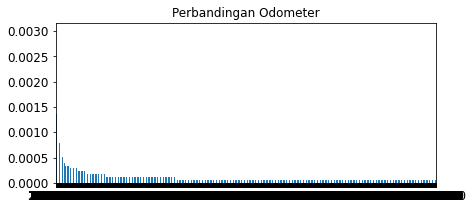

In [14]:
plt.subplots(figsize=(15,10))
plt.subplot(321)
dataset.odometer.value_counts(100).plot(kind='bar', title="Perbandingan Odometer", fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

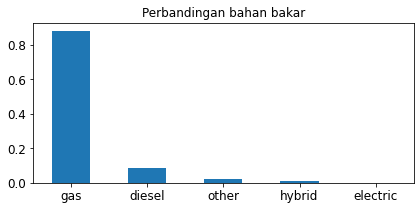

In [15]:
plt.subplots(figsize=(15,10))
plt.subplot(323)
dataset.fuel.value_counts(100).plot(kind='bar', title='Perbandingan bahan bakar', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text major ticklabel objects>)

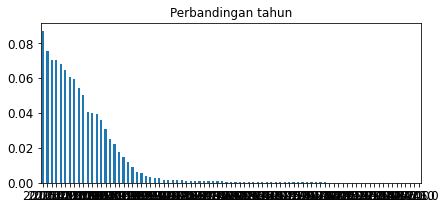

In [16]:
plt.subplots(figsize=(15,10))
plt.subplot(323)
dataset.year.value_counts(100).plot(kind='bar', title='Perbandingan tahun', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25]),
 <a list of 6 Text major ticklabel objects>)

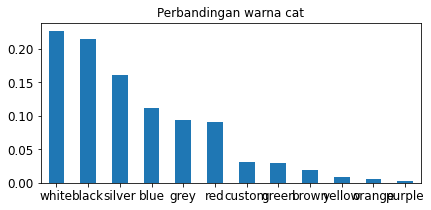

In [17]:
plt.subplots(figsize=(15,10))
plt.subplot(323)
dataset.paint_color.value_counts(100).plot(kind='bar', title='Perbandingan warna cat', fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

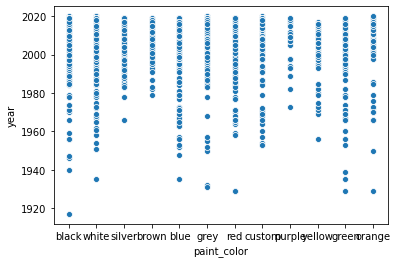

In [18]:
sns.scatterplot(x='paint_color', y='year', data=dataset)

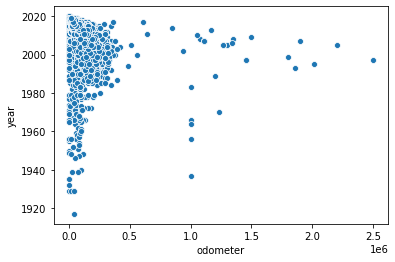

In [19]:
sns.scatterplot(x='odometer', y='year', data=dataset)

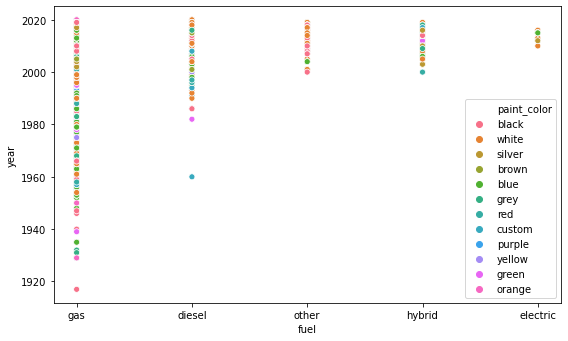

In [20]:
plt.subplots(figsize=(20,12))
plt.subplot(221)
sns.scatterplot(x=dataset.fuel, y=dataset.year, hue=dataset.paint_color)

Pembuatan centroid dengan K = 3

In [21]:
centro = [
    [0, 0, '0'],
    [0, 0, '1'],
    [0, 0, '2'],
]
# buat menjadi dataframe
centroid = pd.DataFrame(centro, columns=['odometer', 'year', 'cluster'])

odometer = []
year = []
x0 = np.random.randint(min(dataset['odometer']),max(dataset['odometer']))
y0 = np.random.randint(min(dataset['year']),max(dataset['year']))
x1 = np.random.randint(min(dataset['odometer']),max(dataset['odometer']))
y1 = np.random.randint(min(dataset['year']),max(dataset['year']))
x2 = np.random.randint(min(dataset['odometer']),max(dataset['odometer']))
y2 = np.random.randint(min(dataset['year']),max(dataset['year']))

odometer.append(x0)
odometer.append(x1)
odometer.append(x2)
year.append(y0)
year.append(y1)
year.append(y2)

centroid['odometer'] =odometer
centroid['year'] = year
centroid

,odometer,year,cluster
0,772829,1933,0
1,1851114,2000,1
2,2307460,1989,2


Penentuan centroid di awal akan mempengaruhi hasil akhir dari clustering

Mengimplementasikan centroid sesuai pada titiknya

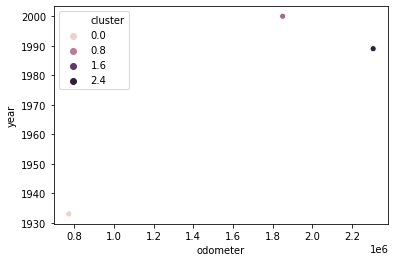

In [22]:
sns.scatterplot(x='odometer', y='year', hue='cluster', data=dataset.append(centroid))

Jika terdapat cluster yang beda, sebagai contoh cluster -1 berarti belum masuk diantara cluster yang ada

Pembuatan data untuk pergantian centroid

In [23]:
update = [
    [0, 0, '0'],
    [0, 0, '1'],
    [0, 0, '2'],
]

# buat menjadi dataframe
NewCentroid = pd.DataFrame(update, columns=['odometer', 'year', 'cluster'])
NewCentroid

,odometer,year,cluster
0,0,0,0
1,0,0,1
2,0,0,2


Proses clustering dan perubahan titik centroid dilakukan hingga posisi titik centroid sudah tidak berpindah lagi

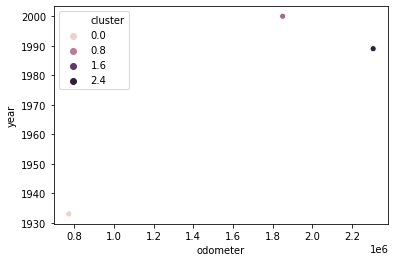

In [24]:
sns.scatterplot(x='odometer', y='year', hue='cluster', data=dataset.append(centroid))

In [25]:
notSame = True
j = 1
while (notSame is True): #akan melakukan looping selama "notSame " bernilai True (titik centroid sudah tidak berubah)
    clusterr = []
    baru  = []

    x02, y02 = centroid.iloc[0][['odometer', 'year']] #mengambil titik Centroid ke 0
    x12, y12 = centroid.iloc[1][['odometer', 'year']] #mengambil titik Centroid ke 1
    x22, y22 = centroid.iloc[2][['odometer', 'year']] #mengambil titik Centroid ke 2

    #mencari centroid terdekat dengan setiap titik
    for i in range(len(dataset)):
        x1, y1 = dataset.iloc[i][['odometer', 'year']] #mengambil titik untuk setiap data pada dataset

        # euclidean distant
        dist0 = ((x02-x1)**2 + (y02-y1)**2)**0.5 
        dist1 = ((x12-x1)**2 + (y12-y1)**2)**0.5
        dist2 = ((x22-x1)**2 + (y22-y1)**2)**0.5

        if (dist0 < dist1) and (dist0 < dist2): #jika nilai dist0 paling kecil, cluster = 0
            hasil = '0'
        elif  (dist1 < dist0) and (dist1 < dist2): #jika nilai dist1 paling kecil, cluster = 1
            hasil = '1'
        elif  (dist2 < dist0) and (dist2 < dist1): #jika nilai dist2 paling kecil, cluster = 2
            hasil = '2'
        clusterr.append(hasil) #append hadil cluster tadi ke list clusterr

    dataset['cluster'] = clusterr #ganti kolom 'cluster' pada dataset dengan list clusterr tadi
    
    #Update centroid
    x0 = dataset[dataset['cluster'] == '0']['odometer'].tolist() #mengambil semua nilai pada kolom 'odometer' yang cluster nya 0
    y0 = dataset[dataset['cluster'] == '0']['year'].tolist() #mengambil semua nilai pada kolom 'year' yang cluster nya 0
    
    #menghitung mean untuk nilai baru dari centroid 0
    
    mean_x0 = sum(x0) / len(x0)
    mean_y0 = sum(y0) / len(y0)

    x1 = dataset[dataset['cluster'] == '1']['odometer'].tolist() #mengambil semua nilai pada kolom 'odometer' yang cluster nya 1
    y1 = dataset[dataset['cluster'] == '1']['year'].tolist() #mengambil semua nilai pada kolom 'year' yang cluster nya 1
    
    #menghitung mean untuk nilai baru dari centroid 1
    mean_x1 = sum(x1) / len(x1)
    mean_y1 = sum(y1) / len(y1)

    x2 = dataset[dataset['cluster'] == '2']['odometer'].tolist() #mengambil semua nilai pada kolom 'odometer' yang cluster nya 2
    y2 = dataset[dataset['cluster'] == '2']['year'].tolist() #mengambil semua nilai pada kolom 'year' yang cluster nya 2
    
    #menghitung mean untuk nilai baru dari centroid 2
    mean_x2 = sum(x2) / len(x2)
    mean_y2 = sum(y2) / len(y2)

    #mengganti nilai centroid baru dengan mean yang sudah dihitung 
    NewCentroid.iloc[0,0] = mean_x0
    NewCentroid.iloc[0,1] = mean_y0
    NewCentroid.iloc[1,0] = mean_x1
    NewCentroid.iloc[1,1] = mean_y1
    NewCentroid.iloc[2,0] = mean_x2
    NewCentroid.iloc[2,1] = mean_y2

    if (NewCentroid.iloc[0,:2].all() != centroid.iloc[0,:2].all()): #jika kolom odometer dan year pada centroid baru dan centroid beda (centroid berpindah)
        #mengganti nilai centroid dengan centroid baru dan mengganti nilai centroid baru (disini saya hanya menukar nilai centroid dan centroid baru)
        centroid,NewCentroid = NewCentroid, centroid 
    else: #jika centroid dan centroid baru sama (centroid tidak berpindah)
        notSame = False #notSame berubah jadi False agar loop berhenti

ZeroDivisionError: ignored

In [0]:
NewCentroid

In [0]:
sns.scatterplot(x='odometer', y='year', hue='cluster', data=dataset.append(centroid))